### 1. 处理数据

In [1]:
import numpy as np


def readData(path):
    """
    :param path: 需要读取的数据
    :return: 对缺失值处理后的数据
    """

    Data = []  # 特征
    Label = []  # 标签

    #没有用的属性的下标
    index = [2, 24, 25, 26, 27]
    with open(path) as f:
        for line in f.readlines():
            # 去除数据两端的空格, 然后使用空格分隔数据
            LineArr = line.strip().split(" ")
            # 获取数据的列的大小
            m = np.shape(LineArr)[0]
            data = []
            for i in range(m):
                if i in index:
                    # 没有用的属性直接跳过
                    continue
                elif i == 22:
                    # 下标为22的属性是分类
                    # 1代表活着，标记设为1
                    # 2,3分别代表死亡，安乐死，标记设为0
                    if LineArr[i] == '?':
                        Label.append(0)
                    elif int(LineArr[i]) == 1:
                        Label.append(1)
                    else:
                        Label.append(0)
                else:
                    #剩下的是有用数据
                    if LineArr[i] == '?':
                        #缺失数据首先由0代替
                        data.append(0.0)
                    else:
                        data.append(float(LineArr[i]))
            Data.append(data)
        Data = np.array(Data)
        Label = np.array(Label)
    return Data, Label

In [2]:
def zeroProcess(data):
    """
    :param data:需要进行0值处理的数据
    :return: 返回把0值已经处理好的数据
    """
    # 获取行列数据
    m, n = np.shape(data)
    # 对0值数据使用当前列的平均数填充
    for i in range(n):
        # 获取当前列的平均值
        avg = np.average(data[:, i])
        #  np.any(data[:,i]) 判断指定列的数据是否有 0 值
        if np.any(data[:, i] == 0):
            # 将当前列的 0 值替换为平均值
            for j in range(m):
                data[j, i] = avg
        else:
            continue
    return data

In [3]:
# 读取数据, 将缺失值替换为 0, 删除缺失类别
train_data, train_label = readData('data/horse-colic.data')
test_data, test_label = readData('./data/horse-colic.test')
# 将当前列的值替换为平均数
train_data = zeroProcess(train_data)
test_data = zeroProcess(test_data)


In [4]:
print(train_data)

[[ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   2.        ]
 [ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   2.        ]
 [ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   2.        ]
 ...
 [ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   1.        ]
 [ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   1.        ]
 [ 1.39333333  1.         30.53433333 ...  0.91666667  1.02666667
   2.        ]]


In [5]:
test_data

array([[ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  2.        ],
       [ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  2.        ],
       [ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  1.        ],
       ...,
       [ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  1.        ],
       [ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  2.        ],
       [ 1.47058824,  1.        , 32.96911765, ...,  1.19117647,
         1.23676471,  1.        ]])

### 2. 绘制图表分析

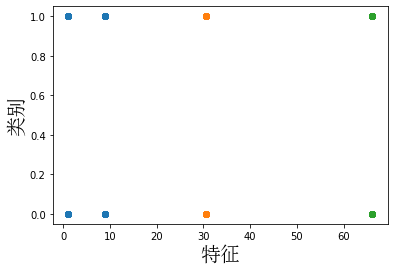

In [6]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置显示的中文字题为宋体
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20)

# 分析前5个特征和数据之间的关系
plt.xlabel(u'特征', fontproperties=font_set)
plt.ylabel('类别', fontproperties=font_set)
plt.scatter(train_data[:, 1], train_label)
plt.scatter(train_data[:, 2], train_label)
plt.scatter(train_data[:, 3], train_label)
plt.show()

### 3. 使用优化算法

In [7]:
from sklearn.linear_model import LogisticRegression

# 使用 liblinear 方法
liblinear_model = LogisticRegression(solver='liblinear', max_iter=10)
liblinear_model.fit(train_data, train_label)

# 输出斜率和参数
print("系数 : ", liblinear_model.coef_)
print("常数项 : ", liblinear_model.intercept_)

# 输出精确率
accuracy_lib = liblinear_model.score(test_data, test_label) * 100

print("正确率为 : %.2f%%" % accuracy_lib)

系数 :  [[-2.15035682e-04 -4.29832792e-02 -4.71241951e-03 -1.02105938e-02
  -3.78678864e-03 -2.94773793e-04 -2.39728774e-04 -3.71425268e-04
  -1.80053800e-04 -3.71939708e-04 -3.84286254e-04 -2.84485005e-04
  -1.76967164e-04 -1.57932905e-04 -1.28352638e-04 -2.80883929e-04
  -3.45703297e-04 -6.45415708e-03 -3.35928948e-03 -1.41470843e-04
  -1.58447344e-04  1.28924784e+00]]
常数项 :  [-0.00015433]
正确率为 : 73.53%


D:\DevApp\anaconda3\envs\dive-into-tf\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
# 使用 sag 方法
sag_model = LogisticRegression(solver='sag', max_iter=5000)
sag_model.fit(train_data, train_label)

# 输出斜率和参数
print("系数 : ", sag_model.coef_)
print("常数项 : ", sag_model.intercept_)

# 输出精确率
accuracy_sag = sag_model.score(test_data, test_label) * 100

print("正确率为 : %.2f%%" % accuracy_sag)

系数 :  [[-2.11114974e-04 -4.30535218e-02 -4.62649880e-03 -1.00244259e-02
  -3.71774480e-03 -2.89399235e-04 -2.35357842e-04 -3.64653137e-04
  -1.76770911e-04 -3.65158197e-04 -3.77279631e-04 -2.79298040e-04
  -1.73740553e-04 -1.55053342e-04 -1.26012407e-04 -2.75762622e-04
  -3.39400150e-04 -6.33647958e-03 -3.29804015e-03 -1.38891430e-04
  -1.55558402e-04  1.27148029e+00]]
常数项 :  [-0.00018229]
正确率为 : 73.53%


### 4. 观察错误率

In [9]:
# 使用 sag 算法对测试数据进行预测
result_predict = sag_model.predict(test_data)


def figure_error_rate(result_predict):
    # 对比测试标签, 统计错误数
    test_len = len(test_data)
    error = 0
    for i in range(test_len):
        if test_label[i] != result_predict[i]:
            error += 1
    # 计算错误率
    error_rate = (error / test_len) * 100
    print("错误率 : %.2f%%" % error_rate)


figure_error_rate(result_predict)

错误率 : 26.47%


In [10]:
sag_model_ite = LogisticRegression(solver='sag', max_iter=1000)
sag_model_ite.fit(train_data, train_label)

result = sag_model_ite.predict(test_data)
figure_error_rate(result)

错误率 : 26.47%


D:\DevApp\anaconda3\envs\dive-into-tf\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 5. 实现命令行程序预测病马


In [23]:
# 存储特征
feature = []

# 输入特征
surgery = int(input("surgery?  1 = Yes, it had surgery , 2 = It was treated without surgery"))
feature.append(surgery)
# 直肠温度
rectal_temperature = float(input("rectal temperature?"))
feature.append(rectal_temperature)

# 由于特征数过多, 本次代码只提供大致思路 ...

# 根据特征生成 ndarray 数组
feature_np = np.asarray(feature)
# 对特征进行reshape
feature_pre = feature_np.reshape(1, train_data.shape[1])
# 预测结果
result_type = sag_model.predict(feature_pre)
if result_type == 1:
    print("存活")
else:
    print("死亡")

存活
